Neural Networks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/NVDA.csv', parse_dates= True, index_col ='Date')
df = df[['Close']]
df.head()


,Close
Date,
2022-09-20,131.759995
2022-09-21,132.610001
2022-09-22,125.610001
2022-09-23,125.160004
2022-09-26,122.279999


<Axes: xlabel='Date'>

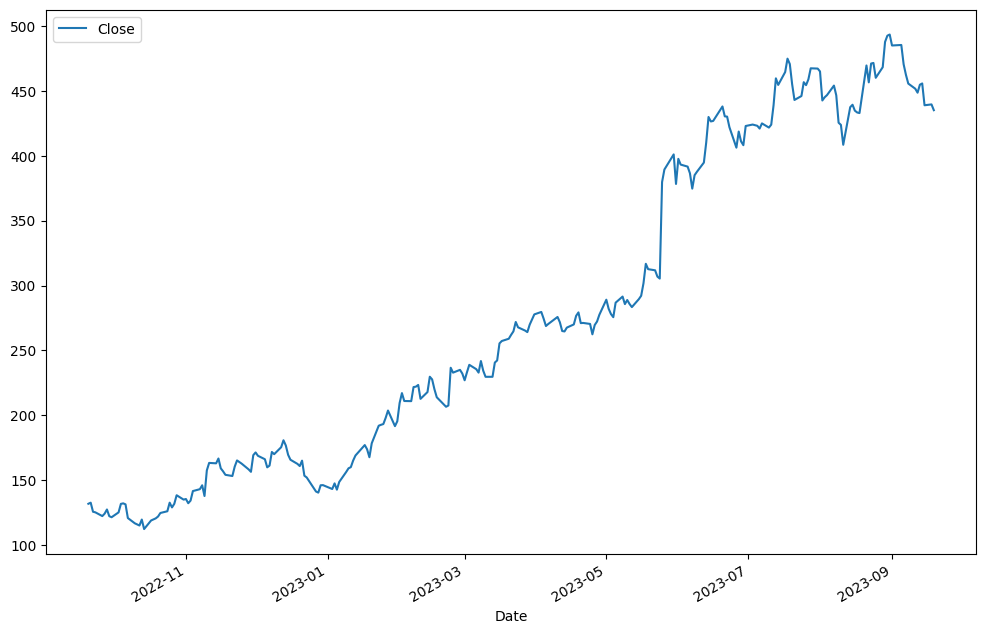

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
train = df.iloc[:190]
test = df.iloc[190:]
train

,Close
Date,
2022-09-20,131.759995
2022-09-21,132.610001
2022-09-22,125.610001
2022-09-23,125.160004
2022-09-26,122.279999
...,...
2023-06-15,426.529999
2023-06-16,426.920013
2023-06-20,438.079987


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)

In [ ]:
scaled_test = scaler.transform(test)

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
lens = len(scaled_test) - 1
print(lens)
generator = TimeseriesGenerator(scaled_train,scaled_train, length=lens, batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=lens, batch_size=1)

60


In [ ]:
X,y = generator[0]
len(X[0])

60

In [ ]:
 from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout


In [ ]:
n_features = 1

In [ ]:
model = Sequential()

model.add(LSTM(50, activation = 'relu', return_sequences = True, input_shape=(60, n_features)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

model.add(Dense(1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
 batch_normalization (Batch  (None, 1)                 4         
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                        

In [ ]:
model.fit_generator(generator, epochs = 200, validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/200


<ipython-input-22-d30a3cd7d8cd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 200, validation_data=validation_generator,callbacks=[early_stop])


130/130 [==============================] - 30s 165ms/step - loss: 0.2104 - val_loss: 0.8089
Epoch 2/200
130/130 [==============================] - 14s 106ms/step - loss: 0.1469 - val_loss: 0.6672
Epoch 3/200
130/130 [==============================] - 9s 67ms/step - loss: 0.1205 - val_loss: 0.5773
Epoch 4/200
130/130 [==============================] - 8s 60ms/step - loss: 0.0984 - val_loss: 0.5096
Epoch 5/200
130/130 [==============================] - 9s 70ms/step - loss: 0.0898 - val_loss: 0.4685
Epoch 6/200
130/130 [==============================] - 9s 71ms/step - loss: 0.0962 - val_loss: 0.4403
Epoch 7/200
130/130 [==============================] - 9s 69ms/step - loss: 0.0901 - val_loss: 0.4222
Epoch 8/200
130/130 [==============================] - 8s 63ms/step - loss: 0.1014 - val_loss: 0.4058
Epoch 9/200
130/130 [==============================] - 9s 72ms/step - loss: 0.0886 - val_loss: 0.4023
Epoch 10/200
130/130 [==============================] - 9s 70ms/step - loss: 0.0989 - val_

In [ ]:
print(len)

<built-in function len>


In [ ]:
def predict_range(lens, input, model, n_features):

  predictions = []
  first_batch = input[-lens:]
  # print(first_batch)
  current_batch = first_batch.reshape((1, lens, n_features))
  # print(current_batch)
  # print(test)
  # print(len(test))

  for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    # print(current_pred)
    predictions.append(current_pred)
    # print('hrllo')

    current_batch = np.append(current_batch[:,1:,:], [current_pred], axis=1)
    # print('hrlle')
  return predictions

In [ ]:
predictions_list = predict_range(60, scaled_train, model, 1)

1/1 [==============================] - 1s 1s/step


In [ ]:
print(predictions_list)

[[0.28816247]]


In [ ]:
true_predictions = scaler.inverse_transform(predictions_list)
test['Predictions'] = true_predictions
# print(true_predictions)
test

ValueError: ignored

In [ ]:
test.plot(figsize=(12,8))

New Attempt

In [ ]:
df = pd.read_csv('/content/NVDA.csv')
inp_dates = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date']).values.astype("int64")


In [ ]:
inp_dates

0     2022-09-20
1     2022-09-21
2     2022-09-22
3     2022-09-23
4     2022-09-26
         ...    
246   2023-09-13
247   2023-09-14
248   2023-09-15
249   2023-09-18
250   2023-09-19
Name: Date, Length: 251, dtype: datetime64[ns]

In [ ]:
dataset = df.filter(['Close']).values

In [ ]:
training_count = 190

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# print(scaled_data)
train_data = scaled_data[0:training_count, :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# LSTMs maintain a memory of past information, allowing them to capture long-term dependencies in the data.
#  This is essential for understanding how past data points affect future predictions in time series forecasting.
# It also uses two LSTM layers stacked on top of each other.
#  Stacking LSTMs can help the network learn complex hierarchical patterns in the data.
#   The first LSTM layer can capture lower-level temporal patterns, and the second layer can capture higher-level patterns,
#    potentially improving the model's ability to make accurate predictions.
# The use of a dense layer with 32 units can add non-linearity and capture complex relationships in the data.
# The dropout layer with a dropout rate of 0.5 can help prevent overfitting.
#  Overfitting occurs when the model learns the training data too well, making it perform poorly on new, unseen data.
#   Dropout can help improve the model's generalization.
model = Sequential()
model.add(LSTM(units=64,return_sequences=True, input_shape=(x_train.shape[1], 1)))

model.add(LSTM(units=64))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7d8cd7c069b0>>

In [ ]:

model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
5/5 [==============================] - 5s 59ms/step - loss: 0.1267
Epoch 2/10
5/5 [==============================] - 0s 59ms/step - loss: 0.0267
Epoch 3/10
5/5 [==============================] - 0s 60ms/step - loss: 0.0285
Epoch 4/10
5/5 [==============================] - 0s 68ms/step - loss: 0.0174
Epoch 5/10
5/5 [==============================] - 0s 96ms/step - loss: 0.0179
Epoch 6/10
5/5 [==============================] - 0s 98ms/step - loss: 0.0144
Epoch 7/10
5/5 [==============================] - 0s 98ms/step - loss: 0.0121
Epoch 8/10
5/5 [==============================] - 0s 97ms/step - loss: 0.0119
Epoch 9/10
5/5 [==============================] - 0s 100ms/step - loss: 0.0089
Epoch 10/10
5/5 [==============================] - 1s 101ms/step - loss: 0.0095


In [ ]:
test_data = scaled_data[training_count - 60:, :]
x_test = []
print(len(dataset))
print(len(test_data))
y_test = dataset[training_count:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

251
121
2/2 [==============================] - 1s 67ms/step
MSE 497.2850902022914
RMSE 22.29988991457786


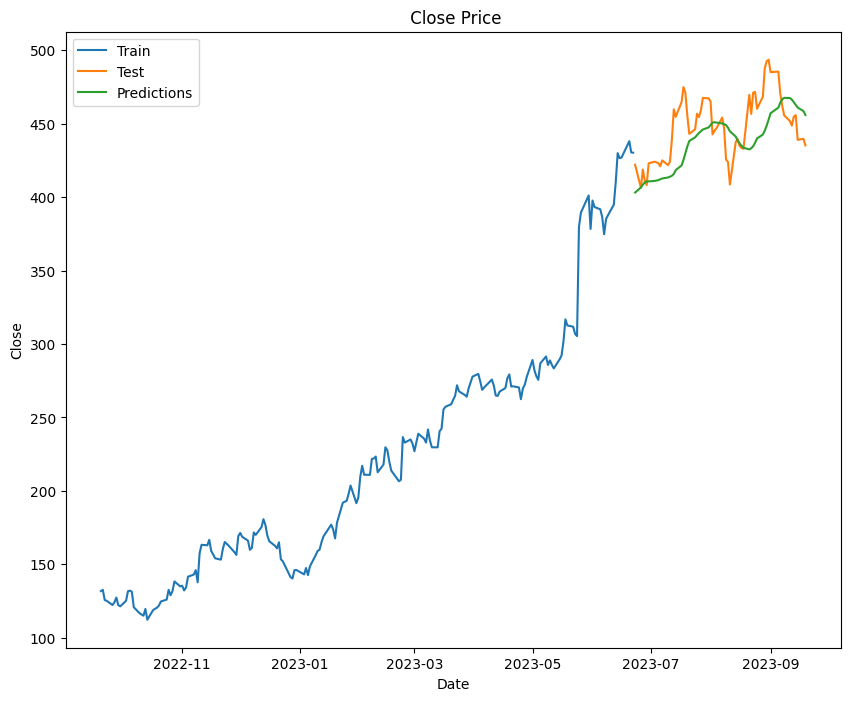

In [ ]:
train = df[:training_count]
test = df[training_count:]
test['Predictions'] = predictions

train['Date'] = inp_dates[:training_count]
train =train.set_index('Date')

test['Date'] = inp_dates[training_count:]
test =test.set_index('Date')

plt.figure(figsize=(10, 8))
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.title(' Close Price')
plt.xlabel('Date')
plt.ylabel("Close")

plt.legend(['Train', 'Test', 'Predictions'])


In [ ]:
from datetime import datetime

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# print(scaled_data)
train_data = scaled_data
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=64,return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=64))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7d8c7efdba60>>

In [ ]:

model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=30)

Epoch 1/30
6/6 [==============================] - 5s 65ms/step - loss: 0.1486
Epoch 2/30
6/6 [==============================] - 0s 64ms/step - loss: 0.0540
Epoch 3/30
6/6 [==============================] - 0s 63ms/step - loss: 0.0434
Epoch 4/30
6/6 [==============================] - 0s 64ms/step - loss: 0.0239
Epoch 5/30
6/6 [==============================] - 0s 63ms/step - loss: 0.0274
Epoch 6/30
6/6 [==============================] - 0s 63ms/step - loss: 0.0241
Epoch 7/30
6/6 [==============================] - 0s 66ms/step - loss: 0.0210
Epoch 8/30
6/6 [==============================] - 0s 63ms/step - loss: 0.0216
Epoch 9/30
6/6 [==============================] - 0s 67ms/step - loss: 0.0194
Epoch 10/30
6/6 [==============================] - 1s 104ms/step - loss: 0.0198
Epoch 11/30
6/6 [==============================] - 1s 109ms/step - loss: 0.0250
Epoch 12/30
6/6 [==============================] - 1s 108ms/step - loss: 0.0174
Epoch 13/30
6/6 [==============================] - 1s 109m

In [ ]:
# op_dates = ['25/10/2023','7/11/23']
# op_date_range = pd.to_datetime(op_dates, errors = 'coerce')

start_date = datetime(2023, 9, 20)
end_date = datetime(2023, 11, 7)
df['Date'] = pd.to_datetime(df['Date']).values.astype("float64")

dates = pd.date_range(start=start_date, end=end_date, freq='1D')#.values.astype("int64").tolist()

In [ ]:
real_test = []
for i in range(60, len(test_data)):
    real_test.append(test_data[i-60:i, 0])

real_test = np.array(real_test)
real_test = np.reshape(real_test, (real_test.shape[0], real_test.shape[1], 1))


In [ ]:
real_predictions = model.predict(real_test)
real_predictions = scaler.inverse_transform(real_predictions)
real_predictions = pd.DataFrame(real_predictions,columns=['Close'])

2/2 [==============================] - 3s 26ms/step


In [ ]:
real_predictions

,Close
0,420.075317
1,422.986633
2,424.439056
3,425.453583
4,425.780609
...,...
56,469.469879
57,467.589203
58,465.864380
59,463.587860


In [ ]:
real_x_test = pd.DataFrame(dates,columns=['Date'])
real_x_test

,Date
0,2023-09-20
1,2023-09-21
2,2023-09-22
3,2023-09-23
4,2023-09-24
5,2023-09-25
6,2023-09-26
7,2023-09-27
8,2023-09-28
9,2023-09-29


In [ ]:
train = df
train['Date'] = inp_dates
train =train.set_index('Date')
train =train.drop(columns=['Open', 'High','Low','Adj Close', 'Volume'])
train

,Close
Date,
2022-09-20,131.759995
2022-09-21,132.610001
2022-09-22,125.610001
2022-09-23,125.160004
2022-09-26,122.279999
...,...
2023-09-13,454.850006
2023-09-14,455.809998
2023-09-15,439.000000


In [ ]:
test = pd.concat([real_x_test, real_predictions], axis=1)
test = test.dropna()
test = test.set_index('Date')
test

,Close
Date,
2023-09-20,401.034668
2023-09-21,403.907013
2023-09-22,405.362579
2023-09-23,406.481567
2023-09-24,406.927429
2023-09-25,406.814636
2023-09-26,407.051575
2023-09-27,407.494537
2023-09-28,407.999756


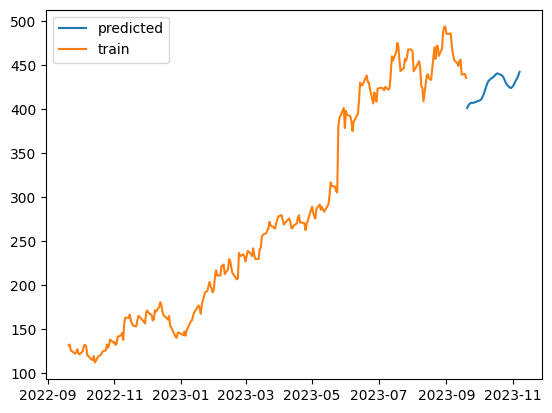

In [ ]:
plt.plot(test)
plt.plot(train)
plt.legend(['predicted','train'])


In [ ]:
# test['Close'].loc['2023-10-25':'2023-11-07']
test.loc['2023-10-25':'2023-11-07']

,Close
Date,
2023-10-25,430.671722
2023-10-26,428.396515
2023-10-27,426.811829
2023-10-28,425.532227
2023-10-29,424.467743
2023-10-30,423.580688
2023-10-31,424.547852
2023-11-01,425.895294
2023-11-02,428.140442
